In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Read the data


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')

df.shape

(7043, 20)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe(include=['number'])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## Let's get a better understanding to the features

`customerID` : just an identifier

---

**`gender`** : whether the customer is male of female.

**`SeniorCitizen`** : if the customer is elderly or not (1 if it is, 0 otherwise).

**`Partner`** : whether the customer has partners or not.

**`Dependents`** : whether the customer has dependents or not.

**`tenure`** : number of months the customer has stayed with the company. (VERY IMPORTNAT).

---

**`MultipleLines`** : whether the customer has multiple phone lines. (VERY IMPORTANT).

**`IntenetService`** : customer's intenret service provider(DSL, fiber optic, No).

**`OnlineSecurity`** : whether the customer has online security add-on.

**`OnlineBackup`** : whether the customer has online backup or not.

**`DeviceProtection`** : whether the customer has device protection or not.

---

**`TechSupport`**  : whether the customer has tech support. 

**`StreamingTV`**  : whether the customer uses streaming TV service. 

**`StreamingMovies`**  : whether the customer uses streaming movies service. 

**`Contract`**  : Type of contract (Month-to-month, One year, Two year).

---


**`PaperlessBilling`**  : whether the customer uses paperless billing.  


**`PaymentMethod`**  : method used to pay bills (e.g., Electronic check, Mailed check, Credit card).  



**`MonthlyCharges`**  : the amount charged to the customer monthly.  



**`TotalCharges`**  : total amount charged over the tenure.  



**`Churn`** *(Target)*  : whether the customer churned (Yes/No).  


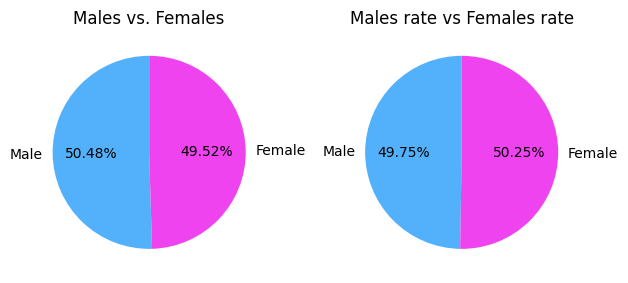

In [7]:
# what is the curn rate by gender?
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index,autopct="%.2f%%", startangle=90, colors=['#52b1fa', '#f043f0'])
plt.title("Males vs. Females")

#----------
number_of_males = df.loc[(df['gender'] == 'Male') & (df['Churn'] == 'Yes'),  'Churn'].value_counts()
males_rate = number_of_males.values / df.shape[0]

males_rate = round(males_rate[0] * 100, 2)

number_of_females = df.loc[(df['gender'] == 'Female') & (df['Churn'] == 'Yes'),  'Churn'].value_counts()
females_rate = number_of_females.values / df.shape[0]

females_rate = round(females_rate[0] * 100, 2)
#----------
mylist = [males_rate, females_rate]
plt.subplot(1,2,2)
plt.pie(mylist, labels=['Male', 'Female'], autopct="%.2f%%", startangle=90, colors=['#52b1fa', '#f043f0'])
plt.title("Males rate vs Females rate")

plt.tight_layout()
plt.show()

this shows that the rate of churn is almost the same as the distribution of genders in the dataset.

In [8]:
df['SeniorCitizen'].value_counts(sort=False)

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

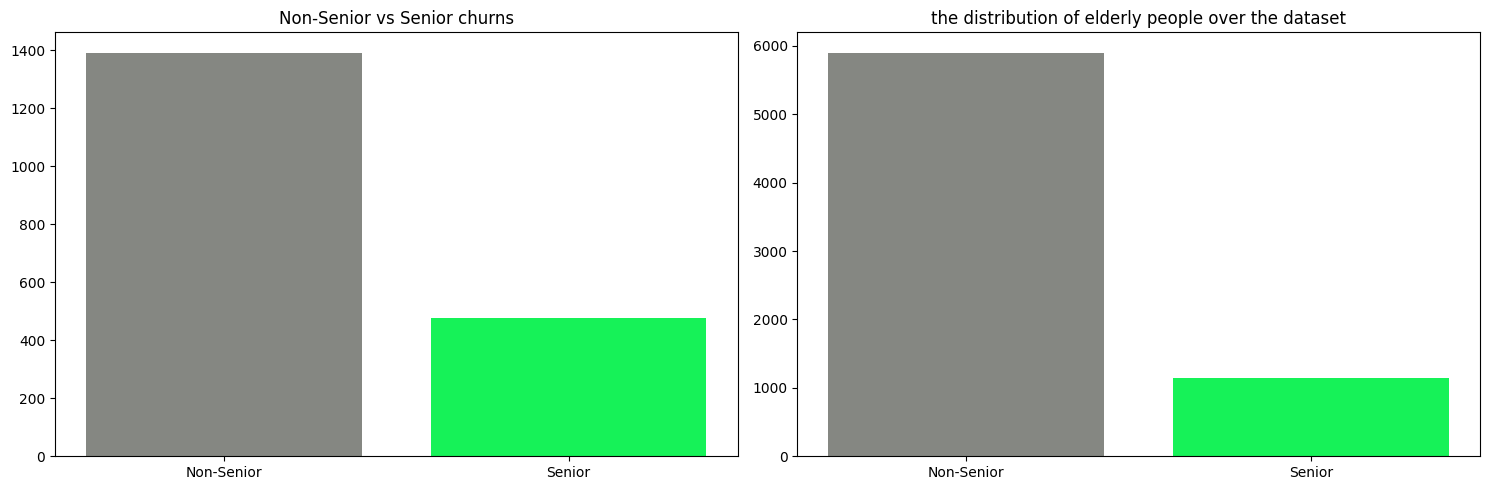

In [9]:
# Do senior citizens (elderly people) churn more than uounger customers?

elderly_people = df.loc[(df['SeniorCitizen'] == 1) & (df['Churn'] == 'Yes'), ['Churn']].value_counts().values[0]

younger_people = df.loc[(df['SeniorCitizen'] == 0) & (df['Churn'] == 'Yes'), ['Churn']].value_counts().values[0]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(x=['Non-Senior', 'Senior'], height=[younger_people, elderly_people], color=['#858782','#16f258'])
plt.title('Non-Senior vs Senior churns')

plt.subplot(1,2,2)
plt.bar(x=['Non-Senior', 'Senior'], height=df['SeniorCitizen'].value_counts(sort=False), color=['#858782','#16f258'])
plt.title("the distribution of elderly people over the dataset")

plt.tight_layout()
plt.show()

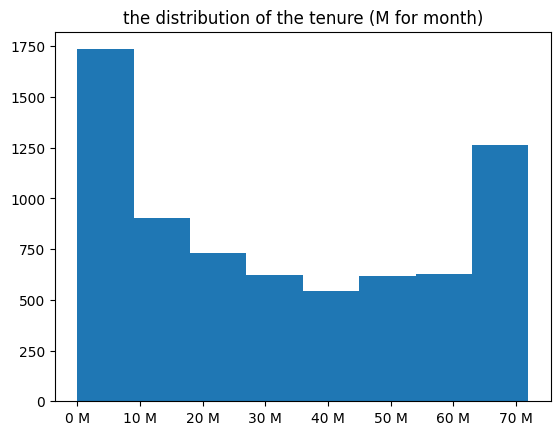

In [10]:
# what is the distribution of the tenure?

plt.hist(df['tenure'], bins=8)
plt.title("the distribution of the tenure (M for month)")
plt.xticks(range(0, 80, 10), ['0 M', '10 M', '20 M', "30 M", "40 M", "50 M", "60 M", "70 M"])
plt.show()

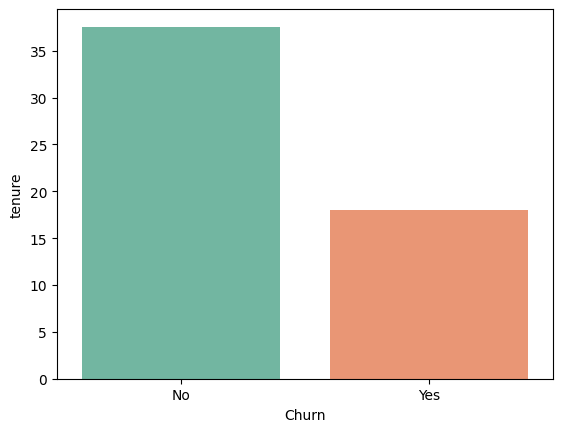

In [11]:
import seaborn as sns

sns.barplot(data=df, x='Churn', y='tenure', palette='Set2', errorbar=None)
plt.show()

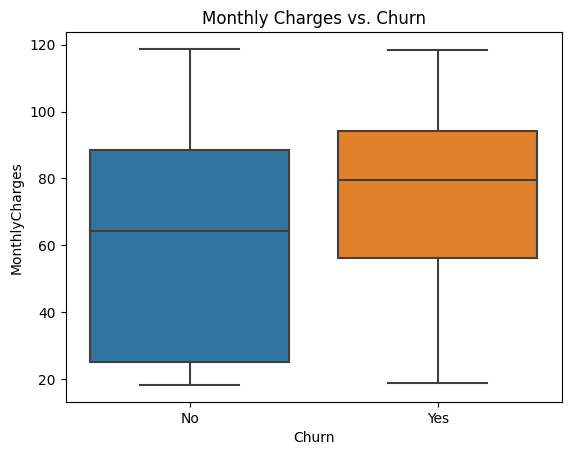

In [12]:
# box-plot of monthly charges vs churn



sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'])
plt.title("Monthly Charges vs. Churn")
plt.show()

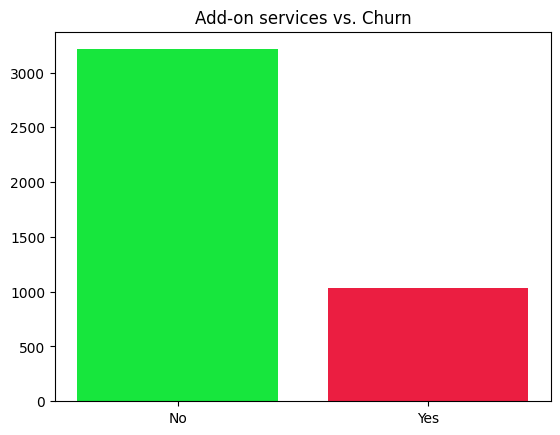

In [13]:
# Are customers with online security, tech support, or device protection less likely to churn?

filteration_with_yes = ((df['OnlineBackup'] == 'Yes') | \
                        (df['OnlineSecurity'] == 'Yes') | \
                        (df['TechSupport'] == 'Yes') | \
                        (df['DeviceProtection'] == 'Yes'))

result = df.loc[filteration_with_yes, ['Churn']].value_counts()

plt.bar(x=['No', 'Yes'], height=result, color=['#17e63d', '#eb1e41'])
plt.title("Add-on services vs. Churn")
plt.show()

it seems that most people who have at least one add-on service are most likely to not churn

## Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [16]:
from sklearn.model_selection import train_test_split

y = df['Churn']
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5986, 19)
(1057, 19)
(5986,)
(1057,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression(max_iter=1000)
rfecv = RFECV(model , step = 1, min_features_to_select = 8 , n_jobs = -1)
rfecv.fit(X_train , y_train)

RFECV(estimator=LogisticRegression(max_iter=1000), min_features_to_select=8,
      n_jobs=-1)

In [18]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [19]:
selected_features = np.where(rfecv.support_)[0]
X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"the accuracy of the radnom forest model is: {accuracy}")

the accuracy of the radnom forest model is: 0.771996215704825


In [22]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']